to perform data preprocessing and data cleaning

##TASK - 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns = iris.feature_names)
data['Species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
Species,0


In [ ]:
data['petal length (cm)'].iloc[5:11] = np.nan

print(data['petal length (cm)'].iloc[5:11])

5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
Name: petal length (cm), dtype: float64


/tmp/ipython-input-6-2812698042.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['petal length (cm)'].iloc[5:11] = np.nan
/tmp/ipython-input-6-2812698042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [ ]:
data['petal length (cm)'].iloc[5:11]

,petal length (cm)
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN
10,NaN


In [ ]:
data['petal length (cm)'].isnull().sum()

np.int64(6)

In [ ]:
data['petal length (cm)'].fillna(data['petal length (cm)'].mean(), inplace = True)

/tmp/ipython-input-9-429549574.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['petal length (cm)'].fillna(data['petal length (cm)'].mean(), inplace = True)


In [ ]:
data['petal length (cm)']

,petal length (cm)
0,1.4
1,1.4
2,1.3
3,1.5
4,1.4
...,...
145,5.2
146,5.0
147,5.2
148,5.4


In [ ]:
data['petal length (cm)'].isnull().sum()

np.int64(0)

In [ ]:
data['petal length (cm)'].iloc[5:11]

,petal length (cm)
5,3.852083
6,3.852083
7,3.852083
8,3.852083
9,3.852083
10,3.852083


In [ ]:
from sklearn.preprocessing import LabelEncoder
df3 = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df3['species'] = [iris.target_names[i] for i in iris.target]
print( df3['species'].head())
le = LabelEncoder()
df3['species_encoded'] = le.fit_transform(df3['species'])
print(df3[['species', 'species_encoded']].head())

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object
  species  species_encoded
0  setosa                0
1  setosa                0
2  setosa                0
3  setosa                0
4  setosa                0


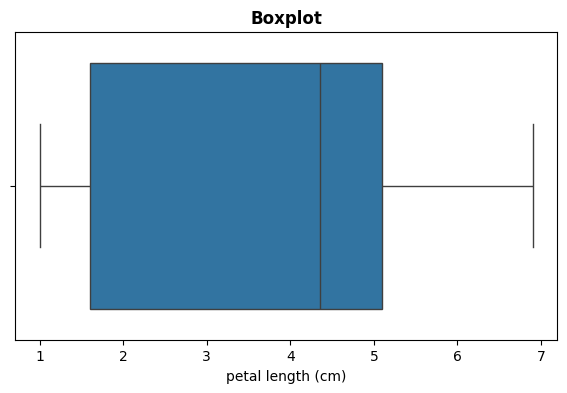

In [ ]:
plt.figure(figsize = (7,4))
sns.boxplot(x = data['petal length (cm)'])
plt.title("Boxplot", fontweight = 'bold')
plt.show()

In [ ]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.852083,1.199333
std,0.828066,0.435866,1.703528,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
encoded = pd.get_dummies(data['Species'])
encoded.head()

,setosa,versicolor,virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False


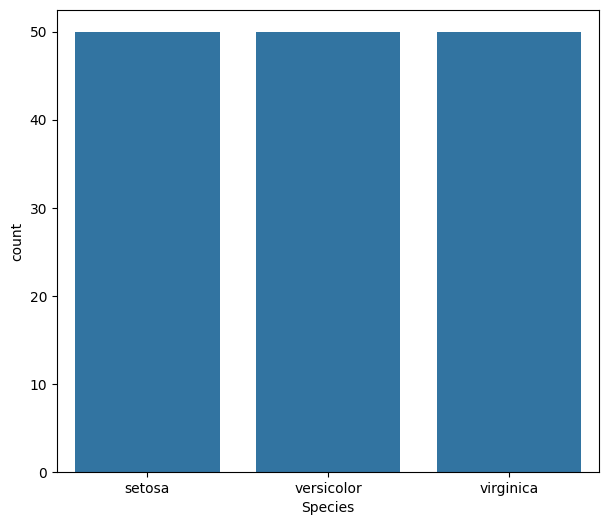

In [ ]:
plt.figure(figsize = (7, 6))
sns.countplot(data = data, x = 'Species')
plt.show()

##TASK - 2

In [ ]:
df = [100, 120, 130, 150, 180, 200, 220, 250]

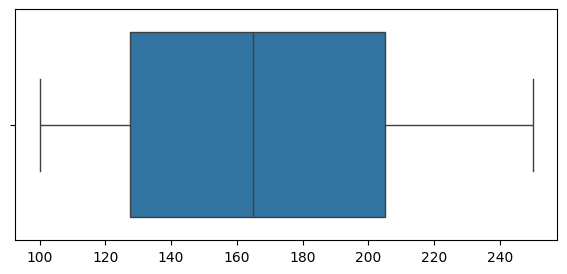

In [ ]:
plt.figure(figsize = (7,3))
sns.boxplot(data = df, orient = 'h')
plt.show()

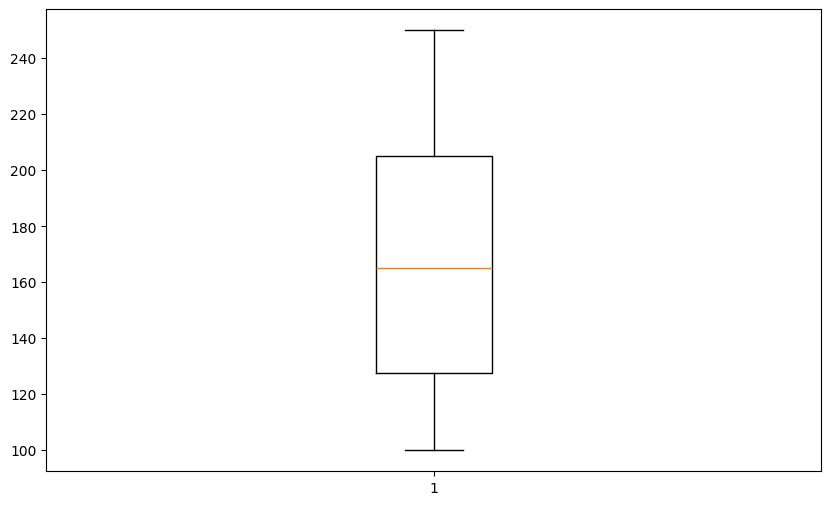

In [ ]:
plt.figure(figsize = (10, 6))
plt.boxplot(df)
plt.show()

In [ ]:
df2 = [0, 100, 120, 130, 150, 180, 200, 220, 250, 400]

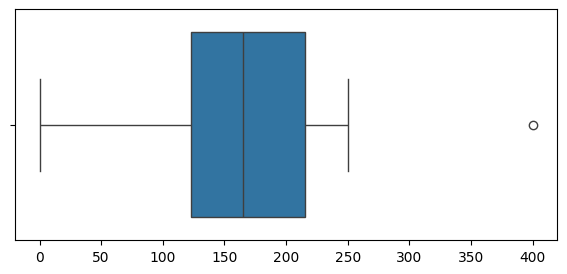

In [ ]:
plt.figure(figsize = (7, 3))
sns.boxplot(data = df2, orient = 'h')
plt.show()

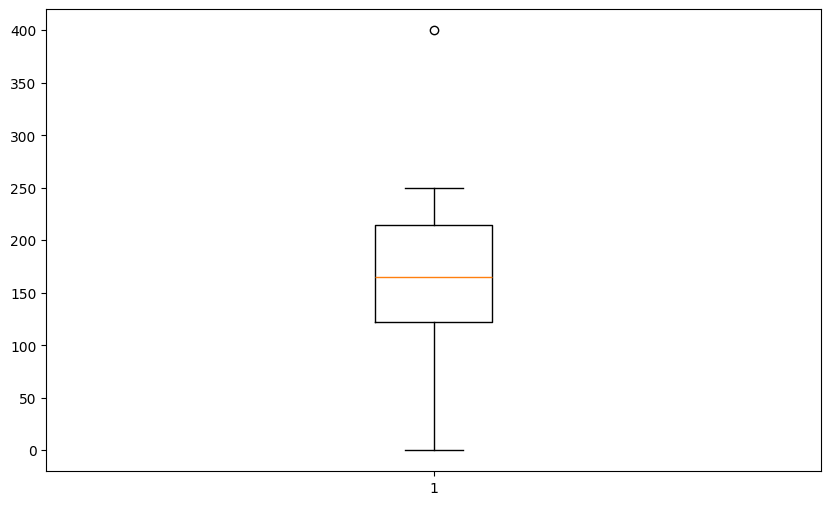

In [ ]:
plt.figure(figsize = (10, 6))
plt.boxplot(df2)
plt.show()

##TASK - 3

In [ ]:
dataframe = pd.read_csv('TestExample2 - Sheet1.csv')

In [ ]:
dataframe

,AREA,PRICE
0,555,769645
1,768,4756786
2,24,254532
3,743,528596
4,485,2354365
5,795,245363
6,785,25634
7,986,1423543
8,666,58787
9,587,786978


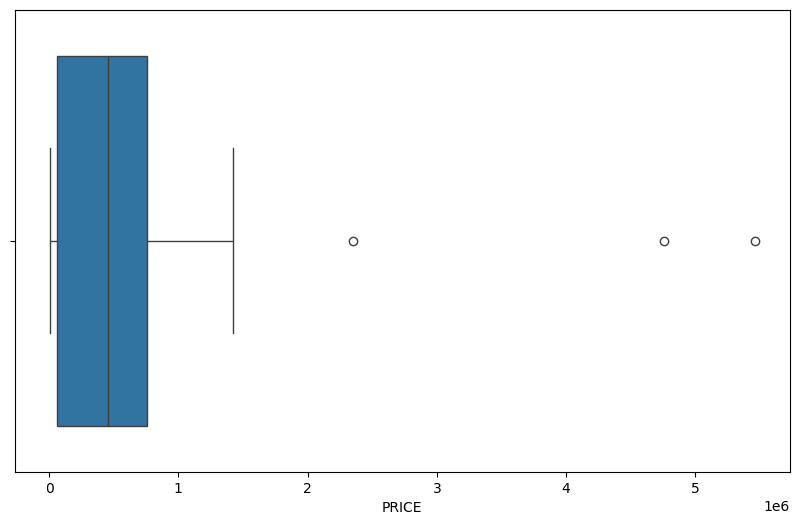

In [ ]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = dataframe['PRICE'], orient = 'h')
plt.show()